In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
from tensorflow.python.framework import ops
import os.path
import csv
import pandas as pd

In [5]:
ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [6]:
# index_col=None is for index, index_col=0 is for unnamed
data = pd.read_csv('processed_data.csv', index_col=0)
data.head()

,International plan,Voice mail plan,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,...,Total intl calls,Customer service calls,average day charge,average eve charge,average night charge,average intl charge,Area_code_408,Area_code_415,Area_code_510,Churn
0,0,1,0,0,0,0,0,0,0,0,...,-0.597527,-0.429172,-0.276822,0.014900,0.402666,-0.070614,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,-0.597527,-0.429172,0.532952,0.005521,-0.452165,-0.076752,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.216894,-1.191955,-0.170897,0.041106,-1.098729,-0.043000,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1.031314,0.333610,-0.118374,0.050503,0.183244,-0.045094,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,-0.597527,1.096392,-0.095093,-0.015797,0.191546,-0.095573,0,1,0,0


In [8]:
# Pull out target variable
y_vals = data['Churn']
y_vals[:5]

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [9]:
# to_frame: 又变回pandas dataframe的格式。
y_vals = y_vals.to_frame()
# Pull out predictor variables
x_vals = data.drop(y_vals,axis=1)

In [11]:
y_vals.head()

,Churn
0,0
1,0
2,0
3,0
4,0


In [12]:
# Split data into train/test = 80%/20%
train_indices = round(len(x_vals)*0.8)
test_indices = len(x_vals) - train_indices
x_vals_train = x_vals[:train_indices]
x_vals_test = x_vals[train_indices:]
y_vals_train = y_vals[:train_indices]
y_vals_test = y_vals[train_indices:]

### fit到LR之中

In [13]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(x_vals, y_vals)  
clf

/Users/libaisun/virtual/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [14]:
predictions = clf.predict(x_vals_test)

from sklearn.metrics import accuracy_score
print ("Logistic Regression accuracy is %2.2f" % accuracy_score(predictions, y_vals_test))

Logistic Regression accuracy is 0.84


## ROC_Curve

https://www.youtube.com/watch?v=OAl6eAyP-yo&t=225s

A receiver operating characteristic curve, i.e., ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 

http://scikit-learn.org/stable/modules/model_evaluation.html

In [15]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_vals_test,clf.predict_proba(x_vals_test)[:,1])

In [16]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_vals_test,predictions)

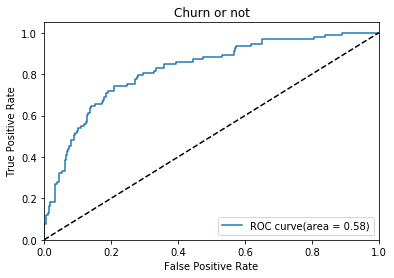

In [17]:
plt.plot(fpr,tpr,label='ROC curve(area = %0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Churn or not')
plt.legend(loc = "lower right")
plt.show()

## Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_vals_test, predictions)
array

array([[432,   8],
       [ 76,  17]])

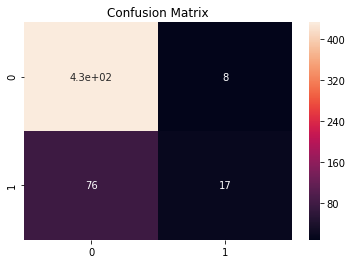

In [19]:
import seaborn as sns
cm = pd.DataFrame(array,index = [0,1],columns = [0,1])
plt.figure()
plt.title('Confusion Matrix')
sns.heatmap(cm,annot=True)

In [28]:
cm

,0,1
0,432,8
1,76,17


In [30]:
cm.iloc[0,0]

432

In [31]:
# 然后可以根据商业价值，对confusion matrix乘以不同的系数。

In [20]:
class_names = [0,1]

Confusion matrix, without normalization
[[432   8]
 [ 76  17]]
Normalized confusion matrix
[[0.98 0.02]
 [0.82 0.18]]


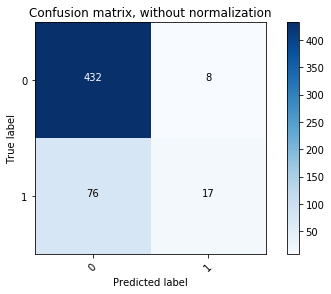

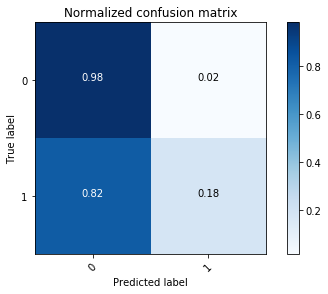

In [68]:
from itertools import *
import itertools
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_vals_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### classification_report

In [56]:
from sklearn.metrics import classification_report
print (classification_report(y_vals_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.98      0.91       440
          1       0.68      0.18      0.29        93

avg / total       0.82      0.84      0.80       533

